## Simulated walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint, seed, choice 
from itertools import combinations
sns.set();
from math import sqrt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
class ChessKnight():
    def __init__(self):
        self.initial_coord=[0,0]
        
    def generate_all_moves(self,coord):
        moves=[]
        x_pos=self.get_xpos(coord)
        y_pos=self.get_ypos(coord)
        moves.extend([[x_pos+2,y_pos+1],[x_pos-2,y_pos+1],
                     [x_pos+2,y_pos-1],[x_pos-2,y_pos-1],
                     [x_pos+1,y_pos+2],[x_pos-1,y_pos+2],
                     [x_pos+1,y_pos-2],[x_pos-1,y_pos-2]])
        return moves

    def generate_possible_moves(self,moves):
        all_moves=[]
        for i in moves:
            if i[0]>=0 and i[1]>=0:
                all_moves.append(i)
        return all_moves
    
    def get_distance(self,coord0,coord1):
        dist=sqrt((coord0[0]-coord1[0])**2+(coord0[1]-coord1[1])**2)
        return dist
    
    def get_xpos(self,coord):
        return coord[0]
    
    def get_ypos(self,coord):
        return coord[1]
    
    def plot_walk(self,completed_moves):
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111)
        for i,j in enumerate(completed_moves[0:-1]):
            xs=[j[0],completed_moves[i+1][0]]
            ys=[j[1],completed_moves[i+1][1]]
            ax.plot(xs,ys, color = np.random.rand(3),linewidth=3)
        ax.set_xlabel("x",fontsize=14)
        ax.set_ylabel("y",fontsize=14)
        ax.grid(True)

    def walk(self,nsteps=10,random_seed=42,repeat=10,complete_moves=False):
        all_distances=[];
        for rep in range(int(repeat)):
            start=self.initial_coord;
            if complete_moves:
                complete_moves=[];complete_moves.append(start)
            for steps in range(nsteps):
                all_moves=self.generate_all_moves(start)
                pos_moves=self.generate_possible_moves(all_moves)
                start=choice(pos_moves)
                if complete_moves:
                    complete_moves.append(start)
            all_distances.append(self.get_distance(self.initial_coord,start))
        if complete_moves:
            return complete_moves
        else:
            return np.mean(all_distances),np.std(all_distances)
        
    def plot_convergence(self,nsteps=10,random_seed=42,repeat=[1e1,1e2,1e3,1e4,1e5],cwalk=False):
        mean=[];std=[];
        for i in repeat:
            if cwalk:
                value=self.cwalk(nsteps=nsteps,repeat=i)
            else:
                value=self.walk(nsteps=nsteps,repeat=i)
            mean.append(value[0]);std.append(value[1])
        fig, (ax1, ax2) = plt.subplots(2)
        fig.suptitle('Convergence of mean and std at nsteps %s'%nsteps)
        ax1.plot(repeat,mean,color = np.random.rand(3),linewidth=3)
        ax2.plot(repeat,std,color = np.random.rand(3),linewidth=3)
        ax1.set_ylabel("Mean",fontsize=14)
        ax2.set_ylabel("Std",fontsize=14)
        ax2.set_xlabel("Number of runs",fontsize=14)
        ax1.tick_params(labelsize=12);
        ax2.tick_params(labelsize=12);
        ax1.grid(True);ax2.grid(2)

    def cwalk(self,nsteps=10,random_seed=42,repeat=1000,complete_moves=False):
        all_distances=[];
        for rep in range(int(repeat)):
            start=self.initial_coord;int_dist=[]
            if complete_moves:
                complete_moves=[];complete_moves.append(start)
            for steps in range(nsteps):
                all_moves=self.generate_all_moves(start)
                pos_moves=self.generate_possible_moves(all_moves)
                start=choice(pos_moves)  
                dist=self.get_distance(self.initial_coord,start)
                int_dist.append(dist)
                if complete_moves:
                    complete_moves.append(start)
            if any(i >= 10 for i in int_dist):
                all_distances.append(self.get_distance(self.initial_coord,start))
        if any(i >= 10 for i in int_dist) and complete_moves:
            return complete_moves
        else:
            return np.mean(all_distances),np.std(all_distances)
   

## Expected value and std after 10 steps

(6.608147053649029, 3.208612241662998)

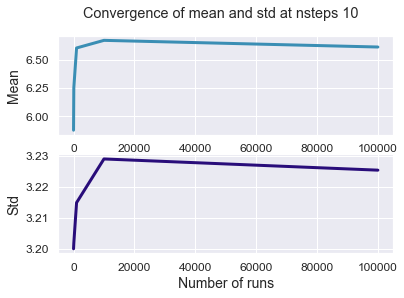

In [3]:
Knight=ChessKnight()
Knight.walk(repeat=10000,nsteps=10)
Knight.plot_convergence(nsteps=10)

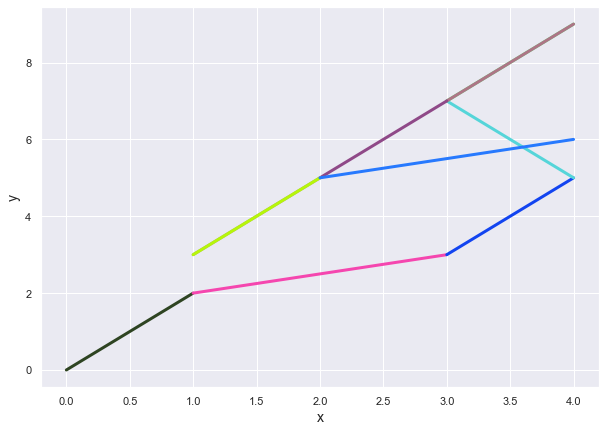

In [4]:
complete_moves=Knight.walk(repeat=1,nsteps=10,complete_moves=True)
Knight.plot_walk(complete_moves)

## Expected value and std after 100 steps

(20.188496140125395, 10.351493785929739)

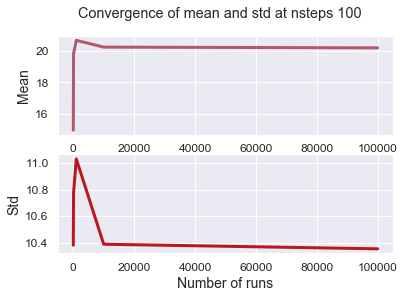

In [5]:
Knight.walk(repeat=20000,nsteps=100)
Knight.plot_convergence(nsteps=100)

## Expected value and std after conditioned walk

(10.860466198856793, 2.250146782196043)

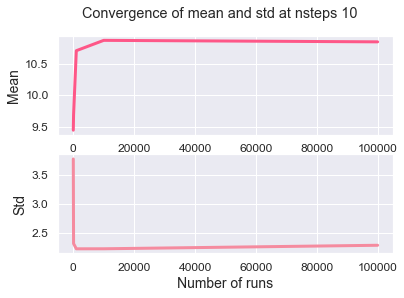

In [17]:
Knight.cwalk(repeat=40000,nsteps=10)
Knight.plot_convergence(nsteps=10,cwalk=True)

[[0, 0], [1, 2], [3, 1], [4, 3], [6, 4], [8, 3], [9, 5], [11, 4], [13, 5], [15, 6], [14, 8]]


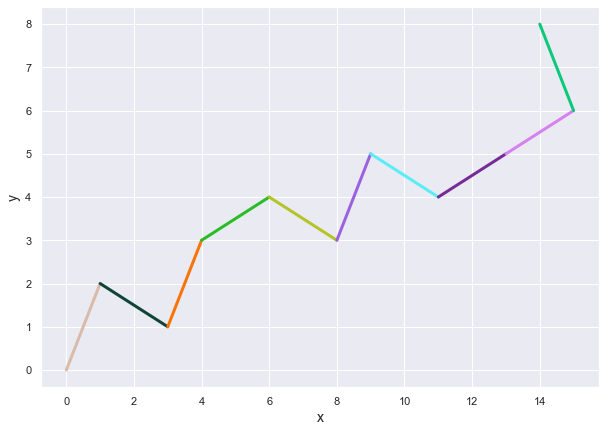

In [16]:
Knight=ChessKnight()
cwalk_completed_moves=Knight.cwalk(repeat=50000,nsteps=10,complete_moves=1)
print (cwalk_completed_moves)
Knight.plot_walk(cwalk_completed_moves)